##**Roshni Jain**

##**Sparks Foundation: Data Science and Business Analytics Task evaluation**

# **Task 6: Create a decision tree classifier and visualize it graphically**

**Classifier**: A classifier algorithm is used to map input data to a target variable through decision rules and can be used to predict and understand what characteristics are associated with a specific class or target.


**Decision Tree**: A decision tree a tree like structure whereby an internal node represents an attribute, a branch represents a decision rule, and the leaf nodes represent an outcome. 

##Importing Libraries and Dataset

In [1]:
##Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset
dataset = pd.read_csv('Iris.csv')

In [3]:
X = dataset.drop(labels = ['Species', 'Id'], axis = 1)
Y = dataset['Species']

#save the feature name and target variables
feature_names = X.columns
labels = Y.unique()

# Splitting the Dataset

In [4]:
##Spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 42)

# Decision Tree Classifier 

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# Tree Diagram for the classfication

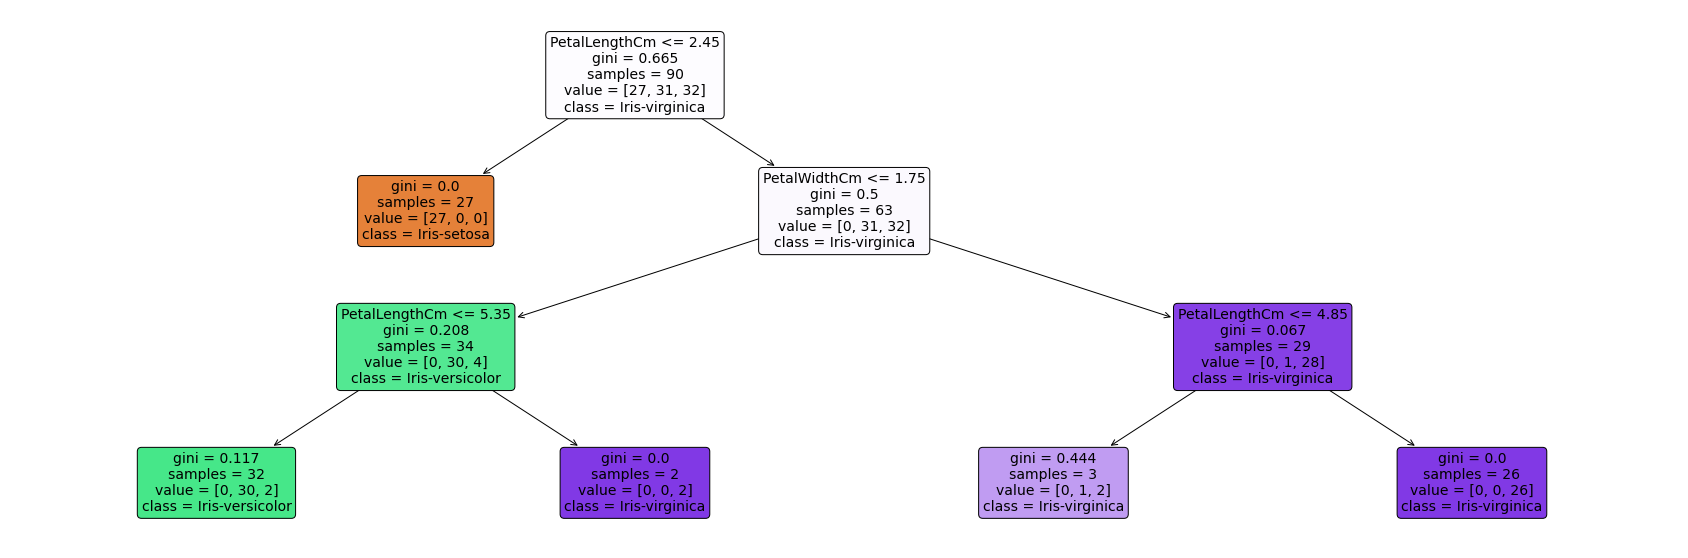

In [7]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='white')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

# Applying the classifier to the test set

In [8]:
test_pred_decision_tree = clf.predict(X_test)

# Confusion matrix for the classification

**Confusion Matrix**: A confusion matrix allows us to visualise how the predicted and true labels match up by showing predicted values on one axis and actual values on the other. This is useful to identify where we may get false positives or false negatives and hence how the algorithm has performed.

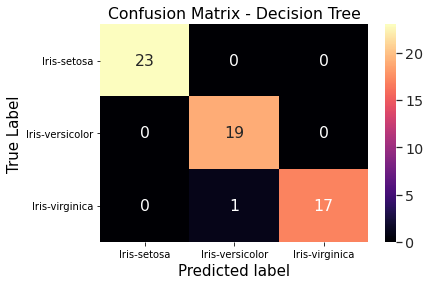

<Figure size 720x504 with 0 Axes>

In [9]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

# Measuring Performance 

**Accuracy**: The accuracy score is the fraction of true positives and true negatives over the total number of assigned labels and is calculated as:

*sum(diagonals in the confusion matrix) / sum (all boxes in the confusion matrix)*

In [10]:
#Accuracy
metrics.accuracy_score(y_test, test_pred_decision_tree)

0.9833333333333333

**Precision**: This tells us how many of the values we predicted to be in a certain class are actually in that class. Essentially, this tells us how we performed in terms of false positives. It is calculated as:

*True positive (number in diagonal)/All positives (column sum)*

In [11]:
#Precision
#get the precision score
precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree, 
                                   average=None)
#turn it into a dataframe
precision_results = pd.DataFrame(precision, index=labels)
#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

,precision
Iris-setosa,1.00
Iris-versicolor,0.95
Iris-virginica,1.00


**Recall**: This tells us how many of the values in each class were given the correct label, thus telling use how it performed relative to false negatives. It is calculated as:

*True positive (number in diagonal)/All assignments (row sum)*

In [12]:
#Recall
recall = metrics.recall_score(y_test, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
Iris-setosa,1.000000
Iris-versicolor,1.000000
Iris-virginica,0.944444


**F1 Score**: This is a weighted average of precision and recall scale, with 1 being the best and 0 the worst. This uses the harmonmic mean, so that the value is closer to the smaller number, and prevents overestimating the performance of the model in cases where one parameter is high and the other low. It is calculated as:

2 * (precision * recall)/(precision + recall) *italicised text*

In [13]:
#F1 score 
f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels)

f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
Iris-setosa,1.000000
Iris-versicolor,0.974359
Iris-virginica,0.971429


Getting All the metrics in a single output 

In [14]:
print(metrics.classification_report(y_test,
                                    test_pred_decision_tree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

